In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Retrieve Data
csv = pd.read_csv('Resources/Australia.csv')

In [3]:
# DF
aus = pd.DataFrame(csv)
aus.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Year', 'Australia', 'Date',
       'Methane (CH4)', 'Carbon dioxide (CO2)', 'Greenhouse Gas (GHGs)',
       'Hydrofluorocarbons (HFCs)', 'Nitrous oxide (N2O)',
       'Perfluorocarbons (PFCs)', 'Sulphur hexafluoride (SF6)'],
      dtype='object')

In [4]:
# Drop Columns
aus = aus.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Date'])
#aus

In [5]:
# Drop Last Row
ausDF = aus[:-1].copy()
ausDF.shape

(29, 9)

In [6]:
# Rename Columns
cols = ['Year', 'Population', 'CH4', 'CO2', 'GHG', 'HFC', 'N2O', 'PFC', 'SF6']
ausDF.columns = cols
print(ausDF.columns)

Index(['Year', 'Population', 'CH4', 'CO2', 'GHG', 'HFC', 'N2O', 'PFC', 'SF6'], dtype='object')


 - train_test_split: splits randomly
 - we want to split the data into distant past (training) and last few years (testing)

In [7]:
ausDF['nextGHG'] = ausDF.shift(1)['GHG']
ausDF

,Year,Population,CH4,CO2,GHG,HFC,N2O,PFC,SF6,nextGHG
0,1990,17065100,124383.179359,278424.660376,424998.380939,1424.683520,15938.285072,4607.012919,220.559694,NaN
1,1991,17284000,124308.869106,279872.660257,426015.210167,1424.683520,15558.911904,4610.743294,239.342085,424998.380939
2,1992,17495000,123741.407630,284912.437867,430216.380429,1333.184000,15367.956218,4603.282544,258.112169,426015.210167
3,1993,17667000,120117.915288,289235.186169,430612.555988,1829.872000,15837.185610,3315.528376,276.868545,430216.380429
4,1994,17855000,116834.941741,294014.960793,430653.332475,1027.343549,16316.051290,2164.428749,295.606353,430612.555988
5,1995,18072000,115158.282185,305410.166605,439004.900544,1004.032111,15585.369029,1530.835665,316.214950,430653.332475
6,1996,18311000,115355.759462,312361.585574,446681.849762,414.170638,16850.841206,1410.395058,289.097823,439004.900544
7,1997,18517000,118199.040671,320795.086167,458841.602460,705.228318,17647.323347,1228.150898,266.773059,446681.849762
8,1998,18711000,117153.717715,334684.517907,472629.669430,998.289580,17892.418013,1660.518820,240.207395,458841.602460
9,1999,18926000,113023.535362,344063.765860,478199.840694,1374.539979,18387.651711,1139.058757,211.289025,472629.669430


In [8]:
# ML
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
training = ausDF.loc[(ausDF['Year']<2010) & (ausDF['Year']>1990)]
testing = ausDF.loc[ausDF['Year']>=2010]

In [9]:
# Set Variables
X_train = training[['Population', 'GHG', 'CH4', 'CO2', 'HFC', 'N2O', 'PFC', 'SF6']]
y_train = training['nextGHG']
X_test = testing[['Population', 'GHG', 'CH4', 'CO2', 'HFC', 'N2O', 'PFC', 'SF6']]
y_test = testing['nextGHG']
X = ausDF[['Population', 'GHG', 'CH4', 'CO2', 'HFC', 'N2O', 'PFC', 'SF6']]
y = ausDF['nextGHG']

In [10]:
# Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [11]:
# Train Model
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Score FOR 1991-2009
model.score(X_train, y_train)

0.9947648150053121

In [13]:
# Score
model.score(X_test, y_test)

-2.6955417426753243

In [14]:
# Predictions vs Actual
predictions = model.predict(X)
print(f"True output: {y[1]}")
print(f"Predicted output: {predictions[1]}")
print(f"Prediction Error: {predictions[1]-y[1]}")

True output: 424998.38093939
Predicted output: 425918.4488608487
Prediction Error: 920.0679214586853


In [15]:
pd.DataFrame({"Year": ausDF["Year"],
              "Predicted": predictions, 
              "Actual": y, 
              "Error": predictions - y})

,Year,Predicted,Actual,Error
0,1990,427754.454803,NaN,NaN
1,1991,425918.448861,424998.380939,920.067921
2,1992,426340.026144,426015.210167,324.815977
3,1993,429029.807055,430216.380429,-1186.573374
4,1994,428509.428708,430612.555988,-2103.127280
5,1995,430725.957670,430653.332475,72.625195
6,1996,439364.522407,439004.900544,359.621863
7,1997,448228.220012,446681.849762,1546.370250
8,1998,461749.219722,458841.602460,2907.617262
9,1999,474112.049102,472629.669430,1482.379672


In [16]:
x_min = X.min()
x_max = X.max()

In [17]:
y_min = y.min()
y_max = y.max()

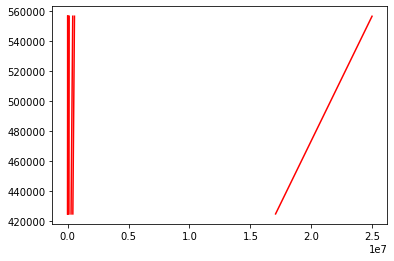

In [18]:
#plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [19]:
print(X.shape, y.shape)

(29, 8) (29,)


In [20]:
print(y)

0               NaN
1     424998.380939
2     426015.210167
3     430216.380429
4     430612.555988
5     430653.332475
6     439004.900544
7     446681.849762
8     458841.602460
9     472629.669430
10    478199.840694
11    489373.841972
12    496982.309756
13    500807.889047
14    502301.775419
15    520315.182055
16    526206.972835
17    530787.987971
18    536888.602053
19    540669.000414
20    544285.461931
21    540571.409834
22    542511.917896
23    544732.756216
24    535006.813813
25    530411.017700
26    538618.776182
27    548862.546493
28    556612.265042
Name: nextGHG, dtype: float64


In [21]:
ausDF

,Year,Population,CH4,CO2,GHG,HFC,N2O,PFC,SF6,nextGHG
0,1990,17065100,124383.179359,278424.660376,424998.380939,1424.683520,15938.285072,4607.012919,220.559694,NaN
1,1991,17284000,124308.869106,279872.660257,426015.210167,1424.683520,15558.911904,4610.743294,239.342085,424998.380939
2,1992,17495000,123741.407630,284912.437867,430216.380429,1333.184000,15367.956218,4603.282544,258.112169,426015.210167
3,1993,17667000,120117.915288,289235.186169,430612.555988,1829.872000,15837.185610,3315.528376,276.868545,430216.380429
4,1994,17855000,116834.941741,294014.960793,430653.332475,1027.343549,16316.051290,2164.428749,295.606353,430612.555988
5,1995,18072000,115158.282185,305410.166605,439004.900544,1004.032111,15585.369029,1530.835665,316.214950,430653.332475
6,1996,18311000,115355.759462,312361.585574,446681.849762,414.170638,16850.841206,1410.395058,289.097823,439004.900544
7,1997,18517000,118199.040671,320795.086167,458841.602460,705.228318,17647.323347,1228.150898,266.773059,446681.849762
8,1998,18711000,117153.717715,334684.517907,472629.669430,998.289580,17892.418013,1660.518820,240.207395,458841.602460
9,1999,18926000,113023.535362,344063.765860,478199.840694,1374.539979,18387.651711,1139.058757,211.289025,472629.669430
